In [10]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
red = pd.read_csv('red.csv')
white = pd.read_csv('white.csv')

red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Analysis and prediction for Red wine

In [13]:
red.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [15]:
red['fixed acidity']

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed acidity, Length: 1599, dtype: float64

In [16]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

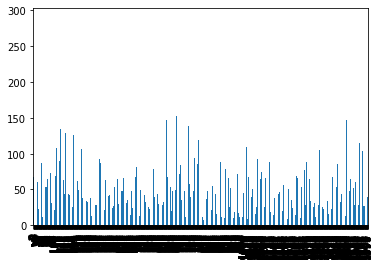

In [17]:
red['total sulfur dioxide'].plot.bar()

In [18]:
red.shape

(1599, 12)

In [19]:
red['fixed acidity'].value_counts()

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.4     1
14.0     1
5.5      1
4.6      1
4.7      1
Name: fixed acidity, Length: 96, dtype: int64

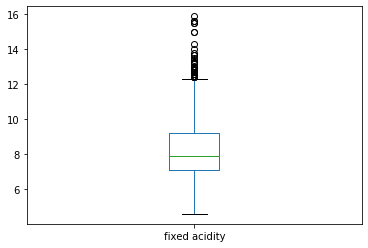

In [20]:
red['fixed acidity'].plot.box()

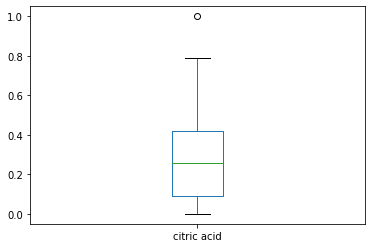

In [21]:
red['citric acid'].plot.box()

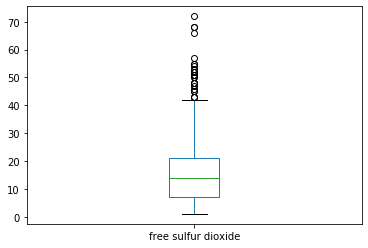

In [22]:
red['free sulfur dioxide'].plot.box()

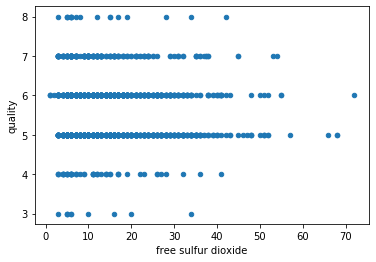

In [23]:
red.plot.scatter('free sulfur dioxide', 'quality')

#### Removing outliers from the dataset

In [24]:
red = red[red['free sulfur dioxide']<60]

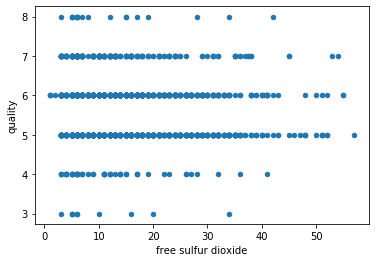

In [25]:
red.plot.scatter('free sulfur dioxide', 'quality')

#### Replacing outliers with mean values

In [26]:
import numpy as np

In [34]:
red.loc[red['fixed acidity']>11.5, 'fixed acidity'] = np.mean(red['fixed acidity'])

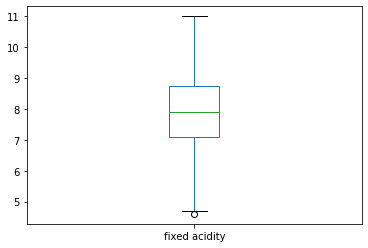

In [35]:
red['fixed acidity'].plot.box()

In [38]:
red.loc[red['free sulfur dioxide']>35, 'free sulfur dioxide'] = np.mean(red['free sulfur dioxide'])

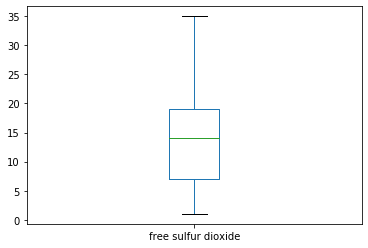

In [39]:
red['free sulfur dioxide'].plot.box()

In [40]:
red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.800000,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.800000,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,8.147165,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.400000,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.900000,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.300000,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.800000,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.500000,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


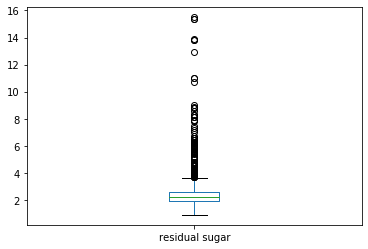

In [52]:
red['residual sugar'].plot.box()

In [54]:
red.loc[red['residual sugar']> 3.7, 'residual sugar'] = np.mean(red['residual sugar'])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
x = red.drop(['quality'],axis = 1)
y = red['quality']

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [58]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
train_pred = model.predict(xtrain)

In [60]:
test_pred = model.predict(xtest)

In [61]:
print("RMSE on Training data of Red wine = ", mean_squared_error(ytrain, train_pred)**(0.5))

RMSE on Training data of Red wine =  0.6512822574043629


In [62]:
print("RMSE on Test data of Red wine = ", mean_squared_error(ytest, test_pred)**(0.5))

RMSE on Test data of Red wine =  0.6432711600255339
